# Linear Regression

## Steps

### 1) Import the required library

### 2) Import data

### 3) Data cleaning
        1) Check missing values 
        2) Check Duplicate
        3) Check out layers by using 'IQR' method
        4) Check structure or unstructured data
        5) Check data type in a correct format
        
### 4) EDA (Exploratory Data Analysis)
        1) Plot the data and check the relations
        2) Correlation(Gradient descent) (The value of corr is above -0.2 or above +0.2)

### 5) Encoad the data(Convert categorical data to numerical data) (if it necessary we use else skip it)
        1) Lable encoding
            It is used for binary categorical data or binary ordered categorical data
        2) One hot encoding
            It is used to Multiclass categorical data for nominal data or unordered data
            
### 6) Split the data      
         Futures (X - axis)(2D Matrix)
         Targe  (Y - axis)(1D Array)
         Train, Test, Split, Random state

### 7) Scaling the data (Scaling only for multi-column  with different range data ) (note:- Scale only future)
           1) Import model
           2) Initialize
           3) Fit (Learning process)
           4) Transform
          
### 8) Apply Machine learning algorithm
           1) Import model
           2) Initialize
           3) Fit (learning process)
           4) Predict

### 9)Evaluation matric (Check whether the model is correct or not)
            The evaluation metric for regression  is r^2 between minus infinite to 1
            A higher the R^2 is a better model


## a) Simple Linear Regression 
* General equation of any straight line 
* y=m*(x) + c 
* y - y-axis 
* m - gradient or slope 
* x - x-axis 
* c - intercept

In [1]:
# 1) Import the required library

# File read
import pandas as pd
import numpy as np

# EDA
import matplotlib.pyplot as plt

# Data spliting
from sklearn.model_selection import train_test_split

# Apply Machine learning algorithm
from sklearn.linear_model import LinearRegression 

# Evaluation matric
from sklearn import metrics

In [2]:
# 2) Import data
data = pd.read_csv('student_scores.csv')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# 3) Data cleaning
    # 1) Check missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
# 3) Data cleaning
    # 2) Check Duplicate
data.duplicated().sum()

0

In [6]:
# 3) Data cleaning
    # 3) Check out layers by using 'IQR' method
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
IQR = data['Hours'].quantile(0.75) - data['Hours'].quantile(0.25)
upper_threshold = data['Hours'].quantile(0.75) + (1.5*IQR)  # > q3 + 1.5iqr
lower_threshold = data['Hours'].quantile(0.25) - (1.5*IQR)  # < q1 - 1.5iqr

data['Hours'] = data['Hours'].clip(upper_threshold, lower_threshold) # eliminate out layers

upper_threshold, lower_threshold

(14.450000000000001, -4.3500000000000005)

In [8]:
# 3) Data cleaning
    # 4) Check structure or unstructure data
data.shape

(25, 2)

In [9]:
# 3) Data cleaning
    # 5) Check data type in a correct format
data.dtypes

Hours     float64
Scores      int64
dtype: object

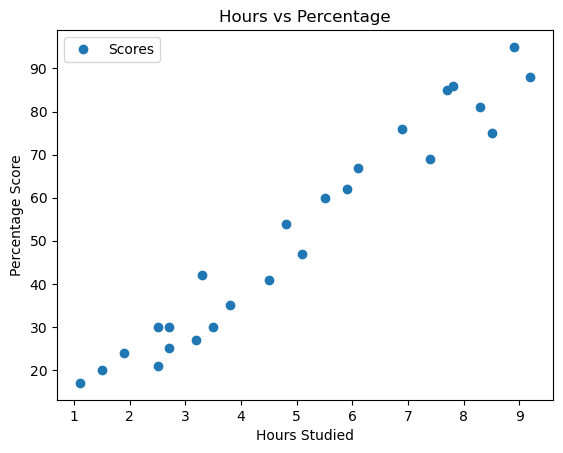

In [10]:
# 4) EDA (Exploratory Data Analysis)
    # 1) Plot the data and check the relations
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()
# Data have relations

In [11]:
# 4) EDA (Exploratory Data Analysis)
    # 2) Correlation(Gradient descent) (The value of corr is above -0.2 or above +0.2)
data.corr() #correlaton
# Data have linear relationship between hours and score

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [12]:
# 5) Encode the data(Convert categorical data to numerical data) 
# It doesn't have categorical data so it is not necessary and skip the step

In [13]:
# Data Pre processing
# 6) Split the data
x = data.loc[ : , ['Hours']] # Futures (X - axis)(2D Matrix)
y = data.loc[ : , 'Scores']  # Targe  (Y - axis)(1D Array)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((18, 1), (7, 1), (18,), (7,))

In [14]:
# Data Pre processing
# 7) Scaling the data (Scaling only for multi-column with different range data so skip the step)

In [15]:
# 8) Apply Machine learning algorithm
    # 1) Import model
from sklearn.linear_model import LinearRegression 
    
    # 2) Initialize
regression = LinearRegression() # y = m*x + c
    
    # 3) Fit (learning process)
regression.fit(x_train,y_train)

    # 4) Predict
X = int(input())
regression.predict([[X]]) # Insert Futures ('x-value')


7


C:\Users\AVA Computers\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.99063666])

In [16]:
print(regression.intercept_) # c - intercept
print(regression.coef_) # m - slope

3.3242582207179296
[9.66662549]


In [17]:
# Check with formula
y = 9.66662549*X + 3.3242582207179296
print(y)

70.99063665071793


In [18]:
# 9)Evaluation matric (Check whether the model is correct or not)
        # The evaluation metric for regression  is r^2 between minus infinite to 1
        # A higher the R^2 is a better model
        
from sklearn import metrics

y_predict = regression.predict(x_test)

df = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_predict})

print(df)
print(metrics.r2_score(y_test,y_predict))

    Actual value  Predicted value
19            69        74.857287
7             60        56.490698
18            67        62.290674
1             47        52.624048
15            95        89.357225
8             81        83.557250
4             30        37.157447
0.930765005790591


## Multiple Linear Regression
* General equation
* y=m1*(x1) +m2*(x2) + m3*(x3) + c 
* y - y-axis 
* m - gradient or slope 
* x - x-axis 
* c - intercept

In [19]:
# 1) Import the required library

# File read
import pandas as pd
import numpy as np

# EDA
import matplotlib.pyplot as plt

# Data spliting
from sklearn.model_selection import train_test_split

# Data Scalling
from sklearn.preprocessing import StandardScaler

# Apply Machine learning algorithm
from sklearn.linear_model import LinearRegression 

# Evaluation matric
from sklearn import metrics

In [20]:
# 2) Import data
petrol_data = pd.read_csv('petrol_consumption.csv')

In [21]:
petrol_data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [22]:
# 3) Data cleaning
    # 1) Check missing values
petrol_data.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [23]:
# 3) Data cleaning
    # 2) Check Duplicate
petrol_data.duplicated().sum()

0

In [24]:
# 3) Data cleaning
    # 3) Check out layers by using 'IQR' method
petrol_data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [25]:
# 1 Check outlayer in Petrol_tax column and eliminate outliers
IQR = petrol_data['Petrol_tax'].quantile(0.75) - petrol_data['Petrol_tax'].quantile(0.25)
upper_threshold = petrol_data['Petrol_tax'].quantile(0.75) + (1.5*IQR)  # > q3 + 1.5iqr
lower_threshold = petrol_data['Petrol_tax'].quantile(0.25) - (1.5*IQR)  # < q1 - 1.5iqr

petrol_data['Petrol_tax'] = petrol_data['Petrol_tax'].clip(upper_threshold, lower_threshold) # eliminate out layers

upper_threshold, lower_threshold

(9.8125, 5.3125)

In [26]:
# 2 Check outlayer in Average_income column and eliminate outliers
IQR = petrol_data['Average_income'].quantile(0.75) - petrol_data['Average_income'].quantile(0.25)
upper_threshold = petrol_data['Average_income'].quantile(0.75) + (1.5*IQR)  # > q3 + 1.5iqr
lower_threshold = petrol_data['Average_income'].quantile(0.25) - (1.5*IQR)  # < q1 - 1.5iqr

petrol_data['Average_income'] = petrol_data['Average_income'].clip(upper_threshold, lower_threshold) # eliminate out layers

upper_threshold, lower_threshold

(5838.375, 2479.375)

In [27]:
# 3 Check outlayer in Paved_Highways column and eliminate outliers
IQR = petrol_data['Paved_Highways'].quantile(0.75) - petrol_data['Paved_Highways'].quantile(0.25)
upper_threshold = petrol_data['Paved_Highways'].quantile(0.75) + (1.5*IQR)  # > q3 + 1.5iqr
lower_threshold = petrol_data['Paved_Highways'].quantile(0.25) - (1.5*IQR)  # < q1 - 1.5iqr

petrol_data['Paved_Highways'] = petrol_data['Paved_Highways'].clip(upper_threshold, lower_threshold) # eliminate out layers

upper_threshold, lower_threshold

(13224.625, -2958.375)

In [28]:
# 4 Check outlayer in Population_Driver_licence(%) column and eliminate outliers
IQR = petrol_data['Population_Driver_licence(%)'].quantile(0.75) - petrol_data['Population_Driver_licence(%)'].quantile(0.25)
upper_threshold = petrol_data['Population_Driver_licence(%)'].quantile(0.75) + (1.5*IQR)  # > q3 + 1.5iqr
lower_threshold = petrol_data['Population_Driver_licence(%)'].quantile(0.25) - (1.5*IQR)  # < q1 - 1.5iqr

petrol_data['Population_Driver_licence(%)'] = petrol_data['Population_Driver_licence(%)'].clip(upper_threshold, lower_threshold) # eliminate out layers

upper_threshold, lower_threshold

(0.6934999999999998, 0.4315000000000002)

In [29]:
petrol_data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.670937,4241.833333,5450.442708,0.569698,576.770833
std,0.923415,573.623768,3149.104278,0.053823,111.885816
min,5.312500,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,9.812500,5342.000000,13224.625000,0.693500,968.000000


In [30]:
# 3) Data cleaning
    # 4) Check structure or unstructure data
petrol_data.shape

(48, 5)

In [31]:
# 3) Data cleaning
    # 5) Check data type in a correct format
petrol_data.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                  float64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

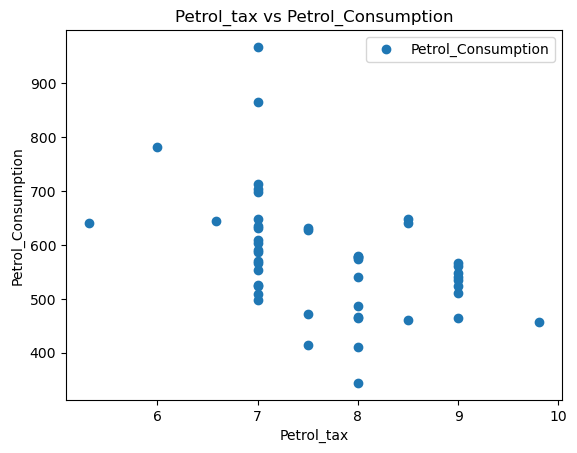

In [32]:
#  Petrol_tax vs Petrol_Consumption
# 4) EDA (Exploratory Data Analysis)
    # 1) Plot the data and check the relations
petrol_data.plot(x='Petrol_tax', y='Petrol_Consumption', style='o')
plt.title('Petrol_tax vs Petrol_Consumption')
plt.xlabel('Petrol_tax')
plt.ylabel('Petrol_Consumption')
plt.show()
# Data have relations

In [33]:
# 4) EDA (Exploratory Data Analysis)
    # 2) Correlation(Gradient descent) (The value of corr is above -0.2 or above +0.2)
petrol_data[['Petrol_tax','Petrol_Consumption']].corr() #correlaton
# Data have linear relationship between Petrol_tax and Petrol_Consumption

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.000000,-0.455955
Petrol_Consumption,-0.455955,1.000000


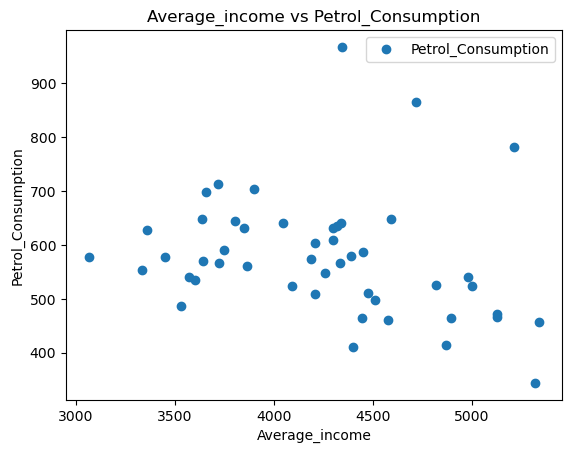

In [34]:
# Average_income vs Petrol_Consumption
# 4) EDA (Exploratory Data Analysis)
    # 1) Plot the data and check the relations
petrol_data.plot(x='Average_income', y='Petrol_Consumption', style='o')
plt.title('Average_income vs Petrol_Consumption')
plt.xlabel('Average_income')
plt.ylabel('Petrol_Consumption')
plt.show()
# Data have relations

In [35]:
# 4) EDA (Exploratory Data Analysis)
    # 2) Correlation(Gradient descent) (The value of corr is above -0.2 or above +0.2)
petrol_data[['Average_income','Petrol_Consumption']].corr() #correlaton
# Data have linear relationship between Average_income and Petrol_Consumption

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


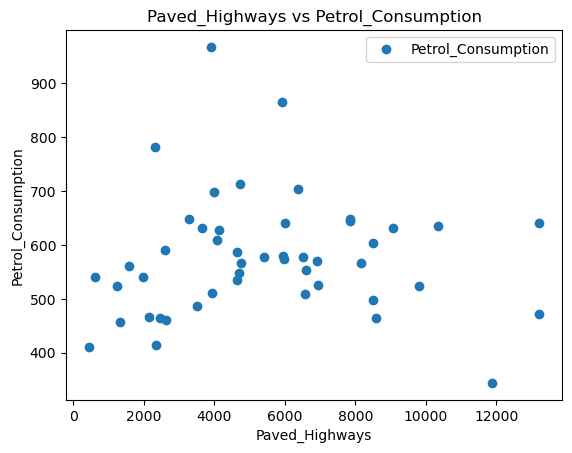

In [36]:
# Paved_Highways vs Petrol_Consumption
# 4) EDA (Exploratory Data Analysis)
    # 1) Plot the data and check the relations
petrol_data.plot(x='Paved_Highways', y='Petrol_Consumption', style='o')
plt.title('Paved_Highways vs Petrol_Consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('Petrol_Consumption')
plt.show()
# Data don'thave relations

In [37]:
# 4) EDA (Exploratory Data Analysis)
    # 2) Correlation(Gradient descent) (The value of corr is above -0.2 or above +0.2)
petrol_data[['Paved_Highways','Petrol_Consumption']].corr() #correlaton
# Data don't have linear relationship between Paved_Highways and Petrol_Consumption so eliminate the column 

,Paved_Highways,Petrol_Consumption
Paved_Highways,1.000000,0.009852
Petrol_Consumption,0.009852,1.000000


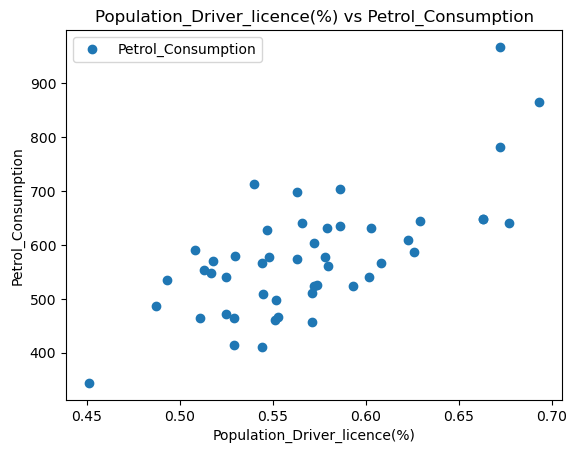

In [38]:
# Population_Driver_licence(%) vs Petrol_Consumption
# 4) EDA (Exploratory Data Analysis)
    # 1) Plot the data and check the relations
petrol_data.plot(x='Population_Driver_licence(%)', y='Petrol_Consumption', style='o')
plt.title('Population_Driver_licence(%) vs Petrol_Consumption')
plt.xlabel('Population_Driver_licence(%)')
plt.ylabel('Petrol_Consumption')
plt.show()
# Data have relations

In [39]:
# 4) EDA (Exploratory Data Analysis)
    # 2) Correlation(Gradient descent) (The value of corr is above -0.2 or above +0.2)
petrol_data[['Population_Driver_licence(%)','Petrol_Consumption']].corr() #correlaton
# Data have linear relationship between Population_Driver_licence(%) and Petrol_Consumption

,Population_Driver_licence(%),Petrol_Consumption
Population_Driver_licence(%),1.000000,0.689301
Petrol_Consumption,0.689301,1.000000


In [40]:
# 5) Encode the data(Convert categorical data to numerical data) 
# It doesn't have categorical data so it is not necessary and skip the step

In [41]:
# Data Pre processing
# 6) Split the data
x = petrol_data.loc[ : , ['Petrol_tax', 'Average_income', 'Population_Driver_licence(%)']] # Futures (X - axis)(2D Matrix)
y = petrol_data.loc[ : , 'Petrol_Consumption']  # Targe  (Y - axis)(1D Array)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((36, 3), (12, 3), (36,), (12,))

In [42]:
# Data Pre processing
# 7) Scalling
    # 1) Import model
from sklearn.preprocessing import StandardScaler

    # 2) Initialize
scaler = StandardScaler()
    
    # 3) Fit (Learning process)
scaler.fit(x_train) # finding the values of mean and standard deviation from the test data

    # 4) Transform
X_train_scaled = scaler.transform(x_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(x_test) # transform the test data 


In [43]:
# 8) Apply Machine learning algorithm
    # 1) Import model
from sklearn.linear_model import LinearRegression 
    
    # 2) Initialize
regression = LinearRegression() # y=m1*(x1) +m2*(x2) + m3*(x3) + c
    
    # 3) Fit (learning process)
regression.fit(X_train_scaled,y_train)

    # 4) Predict
X1 = int(input('Petrol tax: '))
X2 = int(input('Average income: '))
X3 = float(input('Population_Driver licence(%): '))
regression.predict(scaler.transform(np.array([[X1, X2, X3]]))) # Insert Futures ('x-value')


Petrol tax: 8
Average income: 3500
Population_Driver licence(%): 0.50


C:\Users\AVA Computers\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([529.77806364])

In [44]:
print(regression.intercept_) # c - intercept
print(regression.coef_) # m - slope

557.3055555555555
[-18.7433046  -40.49614102  60.03217949]


In [45]:
# Check with formula
# Transform the data point using the scaler
scaled_data_point = (scaler.transform(np.array([[X1, X2, X3]])))

# Now you can use the scaled data point in your equation
y = -18.7433046 * scaled_data_point[0, 0] - 40.49614102 * scaled_data_point[0, 1] + 60.03217949 * scaled_data_point[0, 2] + 557.3055555555555

# Print the result
print(y)

529.7780636329267


C:\Users\AVA Computers\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [46]:
# 9)Evaluation matric (Check whether the model is correct or not)
        # The evaluation metric for regression  is r^2 between minus infinite to 1
        # A higher the R^2 is a better model
        
from sklearn import metrics

y_predict = regression.predict(X_test_scaled)

df = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_predict})

print(df)
print(metrics.r2_score(y_test,y_predict))

    Actual value  Predicted value
26           577       594.459598
44           782       664.415528
7            467       476.684420
39           968       707.018087
36           640       631.559689
46           610       648.539549
20           649       677.268290
29           534       491.689401
19           640       681.031311
8            464       496.488527
17           714       586.096425
32           577       660.957995
0.47370315830649634
